In [1]:
# Загружаем датасет и подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
plt.rcParams.update({'figure.max_open_warning': 0})

from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
import textwrap

In [2]:
df = pd.read_csv('NetflixUserbase.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User ID            2500 non-null   int64 
 1   Subscription Type  2500 non-null   object
 2   Monthly Revenue    2500 non-null   int64 
 3   Join Date          2500 non-null   object
 4   Last Payment Date  2500 non-null   object
 5   Country            2500 non-null   object
 6   Age                2500 non-null   int64 
 7   Gender             2500 non-null   object
 8   Device             2500 non-null   object
 9   Plan Duration      2500 non-null   object
dtypes: int64(3), object(7)
memory usage: 195.4+ KB


In [4]:
df.columns

Index(['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration'],
      dtype='object')

In [5]:
display(df.head())

display(df.tail())

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month
2499,2500,Basic,15,13-08-22,12-07-23,United States,35,Female,Smart TV,1 Month


In [6]:
#Приведение к нижнему регистру и удаление лишних пробелов в названиях столбцов
df.columns = df.columns.str.strip().str.lower()

In [7]:
df.describe()

,user id,monthly revenue,age
count,2500.00000,2500.000000,2500.000000
mean,1250.50000,12.508400,38.795600
std,721.83216,1.686851,7.171778
min,1.00000,10.000000,26.000000
25%,625.75000,11.000000,32.000000
50%,1250.50000,12.000000,39.000000
75%,1875.25000,14.000000,45.000000
max,2500.00000,15.000000,51.000000


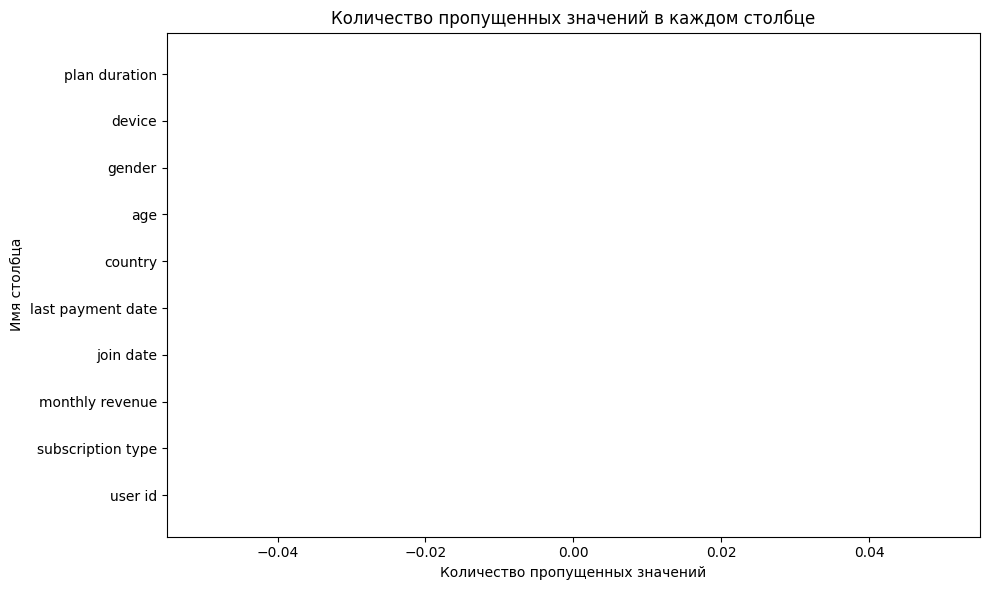

In [8]:
# Создаем список с именами столбцов и количеством пропущенных значений
missing_counts = [df[column].isnull().sum() for column in df.columns]

# Сортируем столбцы в порядке убывания количества пропущенных значений
sorted_columns, sorted_missing_counts = zip(*sorted(zip(df.columns, missing_counts), key=lambda x: x[1], reverse=False))

# Создаем горизонтальную столбчатую диаграмму
plt.figure(figsize=(10, 6))
# Используем barh для горизонтальных столбцов
plt.barh(sorted_columns, sorted_missing_counts)  
plt.xlabel('Количество пропущенных значений')
plt.ylabel('Имя столбца')
plt.title('Количество пропущенных значений в каждом столбце')
plt.tight_layout()

# Отображаем график
plt.show()

In [9]:
columns_isnull = [col for col, count in zip(sorted_columns, sorted_missing_counts) if count > 0]
print(f'Названий столбцов, у которых пропуски:')
for col in columns_isnull:
    print('\t' + col)

Названий столбцов, у которых пропуски:


In [10]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

user id - 0
subscription type - 0
monthly revenue - 0
join date - 0
last payment date - 0
country - 0
age - 0
gender - 0
device - 0
plan duration - 0


In [11]:
# Количество дублирующих значений
df.duplicated().sum()

np.int64(0)

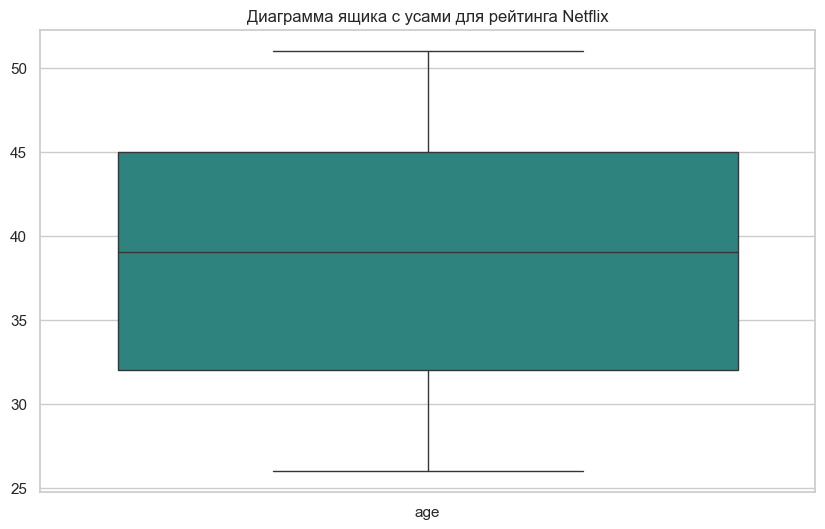

In [12]:
sb.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sb.boxplot(data=df[['age']], palette='viridis')

plt.title('Диаграмма ящика с усами для рейтинга Netflix')
plt.show()

In [13]:
# Создаем словарь для соответствия категорий и их кодов
type_subscription = {
    'Basic': 1,
    'Standard': 2,
    'Premium': 3
}

# Присваиваем числовые коды
df['hotelrating_encoded'] = df['subscription type'].map(type_subscription)

In [14]:
# Подсчет количества типов подписок и сортировка по убыванию
top_Subscription_Type = df['subscription type'].value_counts().nlargest(20).index

# Фильтрация данных по топовым кодам стран
df_top_Subscription_Type = df[df['subscription type'].isin(top_Subscription_Type)]

C:\Users\johns\AppData\Local\Temp\ipykernel_18852\1437772879.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




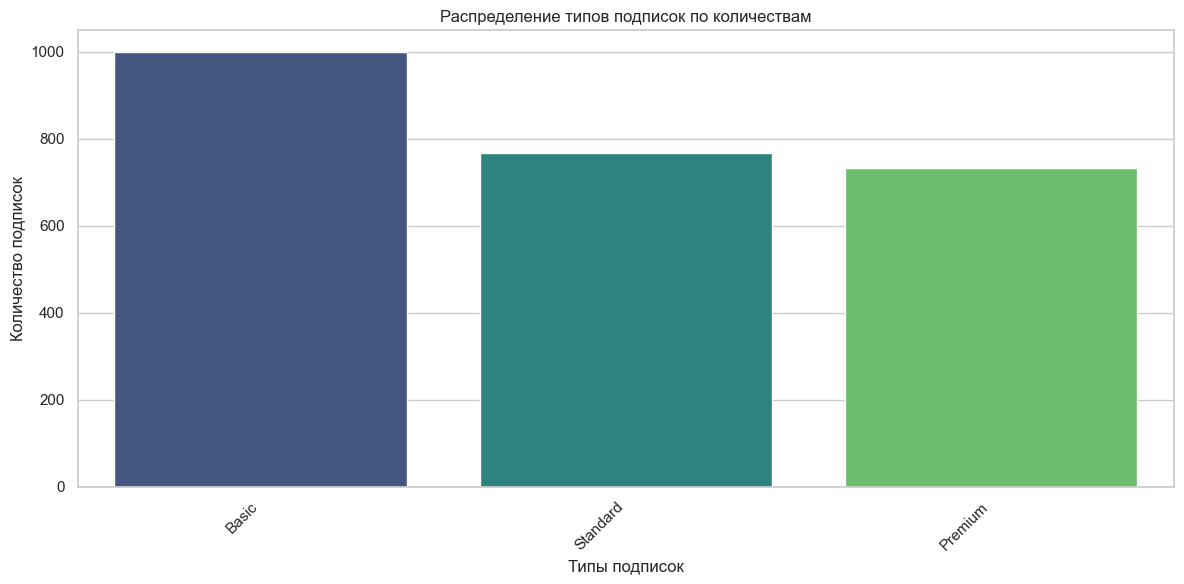

In [15]:
# Установка стиля для графика
sb.set(style="whitegrid")

# Создание диаграммы
plt.figure(figsize=(12, 6))
sb.countplot(x='subscription type', data=df_top_Subscription_Type, order=top_Subscription_Type, palette='viridis')

# Отображение графика
plt.title('Распределение типов подписок по количествам')
plt.xlabel('Типы подписок')
plt.ylabel('Количество подписок')
plt.xticks(rotation=45, ha='right')  # Поворот меток по оси X для удобства чтения

# Отобразим график
plt.tight_layout()
plt.show()

In [16]:
df['subscription type'].value_counts()

subscription type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

In [17]:
# Подсчет количества подписок в каждой стране и сортировка по убыванию
top_country = df['country'].value_counts().nlargest(20).index

# Фильтрация данных для топ 20 стран
data_top_country = df[df['country'].isin(top_country)]

# Подсчет количества подписок в каждой стране и сортировка по убыванию
counts_by_type = df['country'].value_counts().sort_values(ascending=False).index

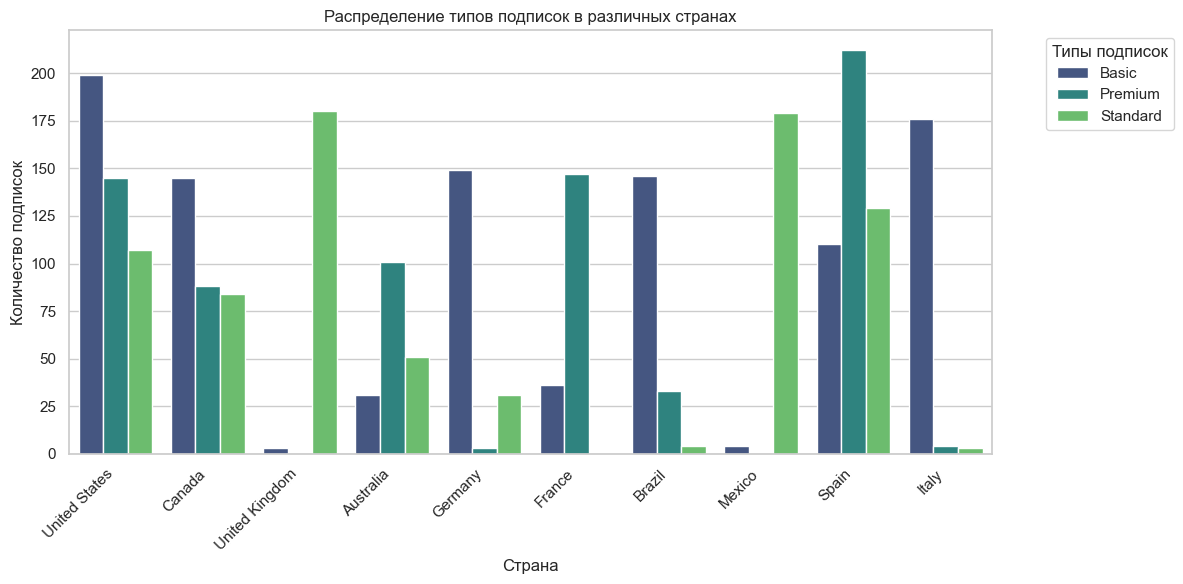

In [18]:
# Установка стиля для графика
sb.set(style="whitegrid")

# Создание гистограммы
plt.figure(figsize=(12, 6))
sb.countplot(data=data_top_country, x='country', hue='subscription type', palette="viridis")
plt.title('Распределение типов подписок в различных странах')
plt.xlabel('Страна')
plt.ylabel('Количество подписок')
plt.xticks(rotation=45, ha='right')  # Поворот меток по оси X, чтобы было удобнее читать под углом
plt.legend(title='Типы подписок', bbox_to_anchor=(1.05, 1), loc='upper left')

# Отображение графика
plt.tight_layout()
plt.show()

In [19]:
df['country'].value_counts()[:20]

country
United States     451
Spain             451
Canada            317
United Kingdom    183
Germany           183
Australia         183
France            183
Brazil            183
Mexico            183
Italy             183
Name: count, dtype: int64

In [20]:
# Подсчет количества подписок в каждом возрасте и сортировка по убыванию
top_age = df['age'].value_counts().nlargest(20).index

# Фильтрация данных для топ 20 возраст
data_top_age = df[df['age'].isin(top_age)]

# Подсчет количества отелей в каждой стране и сортировка по убыванию
counts_by_age = df['age'].value_counts().sort_values(ascending=False).index

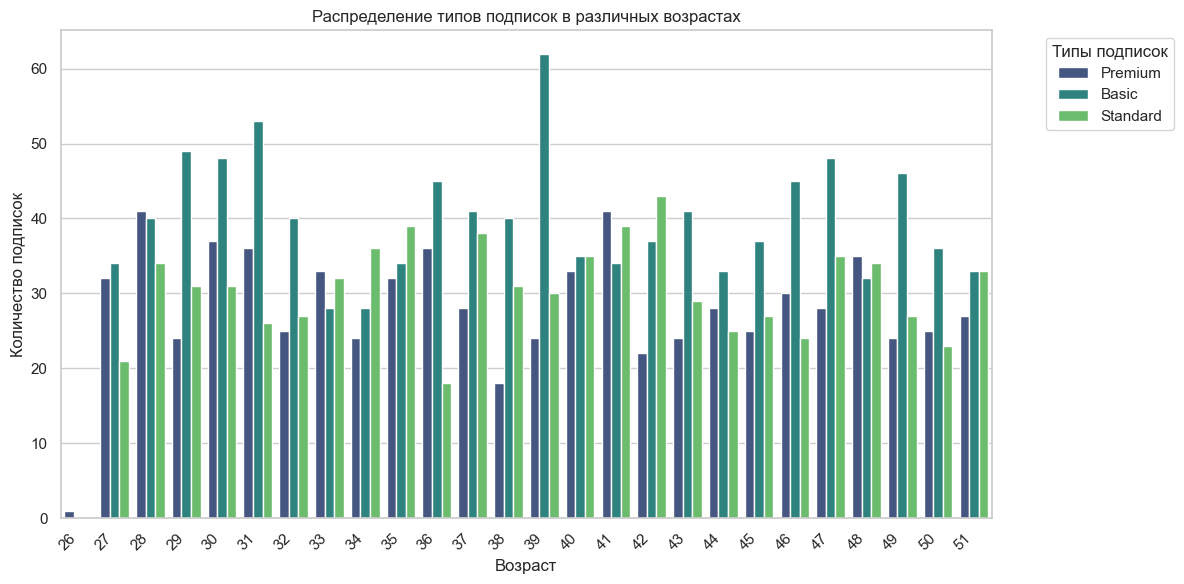

In [21]:
# Установка стиля для графика
sb.set(style="whitegrid")

# Создание гистограммы
plt.figure(figsize=(12, 6))
sb.countplot(data=data_top_country, x='age', hue='subscription type', palette="viridis")
plt.title('Распределение типов подписок в различных возрастах')
plt.xlabel('Возраст')
plt.ylabel('Количество подписок')
plt.xticks(rotation=45, ha='right')  # Поворот меток по оси X, чтобы было удобнее читать под углом
plt.legend(title='Типы подписок', bbox_to_anchor=(1.05, 1), loc='upper left')

# Отображение графика
plt.tight_layout()
plt.show()

In [22]:
df['subscription type'].value_counts()

subscription type
Basic       999
Standard    768
Premium     733
Name: count, dtype: int64

In [23]:
# Группировка данных по количествам подпискам и стране
grouped_data = df.groupby(['country']).agg({
    'subscription type': 'count',  # подсчет количества описаний
}).reset_index()

In [24]:
grouped_data

,country,subscription type
0,Australia,183
1,Brazil,183
2,Canada,317
3,France,183
4,Germany,183
5,Italy,183
6,Mexico,183
7,Spain,451
8,United Kingdom,183
9,United States,451


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user id              2500 non-null   int64 
 1   subscription type    2500 non-null   object
 2   monthly revenue      2500 non-null   int64 
 3   join date            2500 non-null   object
 4   last payment date    2500 non-null   object
 5   country              2500 non-null   object
 6   age                  2500 non-null   int64 
 7   gender               2500 non-null   object
 8   device               2500 non-null   object
 9   plan duration        2500 non-null   object
 10  hotelrating_encoded  2500 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 215.0+ KB


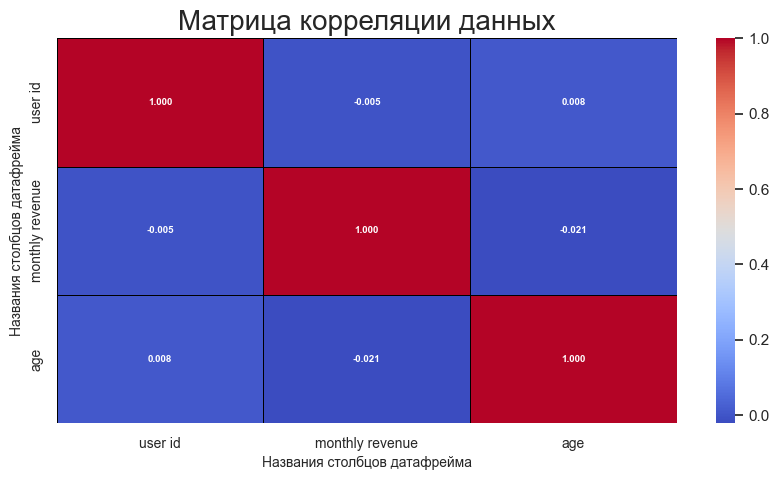

In [26]:
# Корреляционный анализ
plt.figure(figsize=(10, 5))

# Построение тепловой карты корреляции
heatmap = sb.heatmap(
    df[['user id', 'monthly revenue', 'age']].corr().round(3), 
    annot=True, 
    cmap='coolwarm', 
    fmt='.3f', 
    annot_kws={"size": 7, "weight": "bold"}, 
    linewidths=.5,
    linecolor='black');

# Применение настроек шрифта
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

heatmap.set_ylabel('Названия столбцов датафрейма', fontdict={'size': 10})
heatmap.set_xlabel('Названия столбцов датафрейма', fontdict={'size': 10})

# Добавление заголовка
plt.title('Матрица корреляции данных', fontdict={'size': 20});

plt.show()